# The goal of the following code is to predict interest rate of the borrower based on various parameters.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df2_dum = pd.read_csv('df2d.csv')

### The outliers exceeding a z score of 5 are removed.

In [3]:
from scipy import stats
import numpy as np

In [4]:
z = np.abs(stats.zscore(df2_dum))
print(z)
df2 = df2_dum[(z < 5).all(axis=1)]

[[1.71650225 1.37719247 0.09676711 ... 1.43414688 0.81094116 0.6176283 ]
 [1.71650069 1.60888055 1.20611031 ... 0.69727865 1.2331351  0.6176283 ]
 [1.71649913 1.10573128 1.00609862 ... 0.69727865 1.2331351  0.6176283 ]
 ...
 [1.80326282 0.56280892 0.22696315 ... 0.69727865 1.2331351  0.6176283 ]
 [1.80326438 0.34563997 1.72366633 ... 1.43414688 0.81094116 0.6176283 ]
 [1.80326594 0.14841939 1.72366633 ... 1.43414688 0.81094116 0.6176283 ]]


### Since this particular dataset has almost 2.2 million rows and 168 columns, it would be computationally expensive to run machine learning models on this dataset. So we decide to take a small sample of this dataset and proceed.

In [5]:
df3=df2.sample(frac=0.01, replace=False, random_state=0)

In [6]:
df3.to_csv('df3.csv')

In [7]:
print(df2_dum.shape)
print(df3.shape)

(2163266, 168)
(5120, 168)


### Setting interest rate as the dependant variable.

In [8]:
y=df3['int_rate']
l3=list(df3.columns)
l3.remove('int_rate')
X=df3[l3]

### The x and y variables are split into training sets and test sets respectively. Once they are split, they are scaled by using the StandardScaler(). 

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


### Now once the standard scaling has been done, we still find that we are still left with 168 columns. In order to dimensionality reduction to remove redundancy in the dataset, we use Prinicipal Component Analysis.

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca.fit(X_train)
pca.n_components_

50

### Now we are left with 50 variables and we can start performing regression.

In [11]:
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

### Linear Regression:

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

lreg = LinearRegression()
lreg.fit(X_train_reduced, y_train)
mn = 'Linear Regression'

In [13]:
cv_train=cross_val_score(lreg, X_train_reduced, y_train).mean()
cv_test=lreg.score(X_test_reduced, y_test)
print('Train score: %.4f'%cv_train)
print('Test score: %.4f'%cv_test)

Train score: 0.9396
Test score: 0.9351


c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


### We add the train scores, and test scores along with the key parameters to a dataframe 'mr' for easy readablity and comparison between models.

In [14]:
mr = pd.DataFrame(columns=('S.No','Model_Name','Parameters', 'Train_Score', 'Test_Score'))

In [15]:
mr.loc[len(mr)]=[1,mn,'none',cv_train,cv_test]

In [16]:
mr

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,Linear Regression,none,0.939625,0.935107


In [17]:
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

### A simple line plot between the predicted values and the actual values.

c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


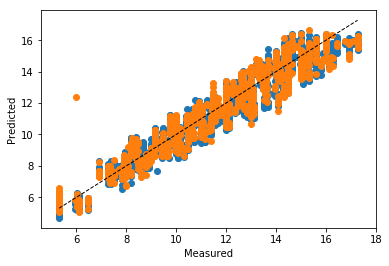

In [18]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = cross_val_predict(lreg,X_train_reduced,y_train)
ax.scatter(y_train, predicted)
predicted = cross_val_predict(lreg,X_test_reduced,y_test)
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

### Lasso Regression:

In [19]:
from sklearn.linear_model import Lasso
kfold =KFold(n_splits=3, random_state=0)
param_grid={'alpha':[0.0001,0.001,0.01, 0.1, 0.5, 1, 5, 10]}
grid_search = GridSearchCV(Lasso(), param_grid, cv=kfold, return_train_score=True)
grid_search.fit(X_train_reduced,y_train)

grid_search_test=cross_val_score(grid_search,X_test_reduced,y_test,cv=kfold).mean()

In [20]:
print("parameters",grid_search.best_params_)
print("Train:",grid_search.best_score_)
print("Test",grid_search_test)

parameters {'alpha': 0.001}
Train: 0.9396301075396659
Test 0.9302277059122678


Appending the scores to 'Model Results' for readablity.

In [21]:
mr.loc[len(mr)]=[2,'Lasso Regression',grid_search.best_params_,grid_search.best_score_,grid_search_test]

In [22]:
mr

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,Linear Regression,none,0.939625,0.935107
1,2,Lasso Regression,{'alpha': 0.001},0.939630,0.930228


We can now understand by plotting the relation between the predicted values and observed values.

c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


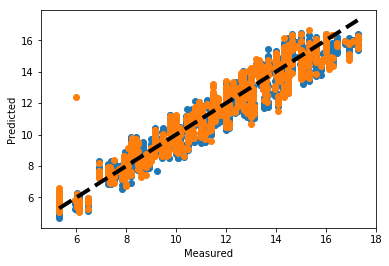

In [23]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = cross_val_predict(grid_search,X_train_reduced,y_train, cv=kfold)
ax.scatter(y_train, predicted)
predicted = cross_val_predict(grid_search,X_test_reduced,y_test, cv=kfold)
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

## KNN Regressor

In [32]:
from sklearn.neighbors import KNeighborsRegressor
kfold =KFold(n_splits=5, random_state=0)
param_grid={'n_neighbors':range(1,10)}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=kfold, return_train_score=True)
grid_search.fit(X_train_reduced,y_train)

knn_ts=cross_val_score(grid_search, X_test_reduced, y_test, cv=kfold).mean()

In [33]:
print("Train:",grid_search.best_score_)
print("Test",knn_ts)
print("parameters",grid_search.best_params_)

Train: 0.9151193144150496
Test 0.8811572183589151
parameters {'n_neighbors': 9}


As we can see, The best K value for K nearest neighbors is 9.

In [34]:
mr.loc[len(mr)]=[3,'KNN Regression',grid_search.best_params_,grid_search.best_score_,knn_ts]

In [35]:
mr

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,Linear Regression,none,0.939625,0.935107
1,2,Lasso Regression,{'alpha': 0.001},0.939630,0.930228
2,3,KNN Regression,{'n_neighbors': 9},0.915119,0.881157


c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


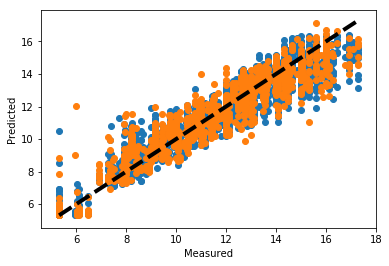

In [36]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = cross_val_predict(grid_search,X_train_reduced,y_train, cv=kfold)
ax.scatter(y_train, predicted)
predicted = cross_val_predict(grid_search,X_test_reduced,y_test, cv=kfold)
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

## Ridge Regression

In [37]:
from  sklearn.linear_model import Ridge
kfold =KFold(n_splits=3, random_state=0)
param_grid={'alpha':[0.001,0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(Ridge(), param_grid, cv=kfold, return_train_score=True)
grid_search.fit(X_train_reduced,y_train)
test_ri=cross_val_score(grid_search,X_test_reduced,y_test,cv=kfold).mean()

In [38]:
print("Train:",grid_search.best_score_)
print("Test",test_ri)
print("parameters",grid_search.best_params_)

Train: 0.9396295315012985
Test 0.9303026841086325
parameters {'alpha': 10}


In [39]:
mr.loc[len(mr)]=[4,'Ridge Regression',grid_search.best_params_,grid_search.best_score_,test_ri]

In [40]:
mr

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,Linear Regression,none,0.939625,0.935107
1,2,Lasso Regression,{'alpha': 0.001},0.939630,0.930228
2,3,KNN Regression,{'n_neighbors': 9},0.915119,0.881157
3,4,Ridge Regression,{'alpha': 10},0.939630,0.930303


## Polynomial Regression

In [41]:
from  sklearn.preprocessing  import PolynomialFeatures
kfold =KFold(n_splits=5, random_state=0)
train_s_list = []
test_s_list = []
for n in range(2,4):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train_reduced)
    X_test_poly = poly.transform(X_test_reduced)
    train_s_list.append(cross_val_score(lreg, X_train_poly, y_train,scoring='r2',cv=kfold).mean())
    lreg.fit(X_train_poly, y_train)
    test_s_list.append(cross_val_score(lreg,X_test_poly, y_test,scoring='r2',cv=kfold).mean())

In [42]:
print(train_s_list)
print(test_s_list)

[0.929628953159227, 0.8954535153017265]
[0.49332849337787466, 0.8712260360259997]


The best scores are rendered by polynomials of degree 2.

In [43]:
print("Train",train_s_list[1])
print("Test",test_s_list[1])
print("Best Parameters n=",2)

Train 0.8954535153017265
Test 0.8712260360259997
Best Parameters n= 2


Adding the scores to the model results

In [44]:
mr.loc[len(mr)]=[5,'Polynomial Regression',2,train_s_list[1],test_s_list[1]]

In [45]:
mr

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,Linear Regression,none,0.939625,0.935107
1,2,Lasso Regression,{'alpha': 0.001},0.939630,0.930228
2,3,KNN Regression,{'n_neighbors': 9},0.915119,0.881157
3,4,Ridge Regression,{'alpha': 10},0.939630,0.930303
4,5,Polynomial Regression,2,0.895454,0.871226


c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


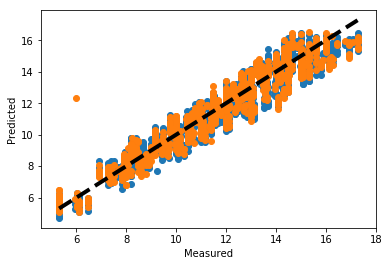

In [46]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = cross_val_predict(grid_search,X_train_reduced,y_train, cv=kfold)
ax.scatter(y_train, predicted)
predicted = cross_val_predict(grid_search,X_test_reduced,y_test, cv=kfold)
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

### Linear SVR Model

In [47]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV
kfold =KFold(n_splits=2, random_state=0)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 0.5, 10, 100]}
grid_search = GridSearchCV(LinearSVR(), param_grid, cv=kfold, return_train_score=True)

grid_search.fit(X_train_reduced, y_train)

test=cross_val_score(grid_search,X_test_reduced, y_test,scoring='r2',cv=kfold).mean()

c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\91909\appdata\local\programs\python\python36\lib\site-packa

In [48]:
print("Train set score with best parameters: {:.5f}".format(grid_search.best_score_))
print("Test set score with best parameters: {:.5f}".format(test))
print("best parameters are:",grid_search.best_params_)

Train set score with best parameters: 0.93714
Test set score with best parameters: 0.92505
best parameters are: {'C': 1}


In [49]:
mr.loc[len(mr)]=[6,'Linear SVR Model',grid_search.best_params_,grid_search.best_score_,test]

In [50]:
mr

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,Linear Regression,none,0.939625,0.935107
1,2,Lasso Regression,{'alpha': 0.001},0.939630,0.930228
2,3,KNN Regression,{'n_neighbors': 9},0.915119,0.881157
3,4,Ridge Regression,{'alpha': 10},0.939630,0.930303
4,5,Polynomial Regression,2,0.895454,0.871226
5,6,Linear SVR Model,{'C': 1},0.937138,0.925050


c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\91909\appdata\local\programs\python\python36\lib\site-packa

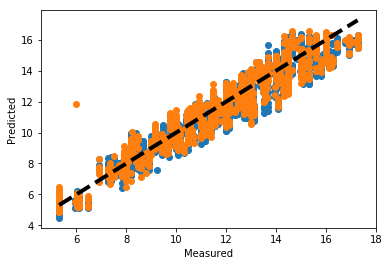

In [51]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = cross_val_predict(grid_search,X_train_reduced,y_train, cv=kfold)
ax.scatter(y_train, predicted)
predicted = cross_val_predict(grid_search,X_test_reduced,y_test, cv=kfold)
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

## SVR with Kernel Trick

In [52]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
kfold =KFold(n_splits=2, random_state=0)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVR(kernel='linear'), param_grid, cv=kfold, return_train_score=True)

grid_search.fit(X_train_reduced, y_train)

test=cross_val_score(grid_search,X_test_reduced, y_test,scoring='r2',cv=kfold).mean()
train=cross_val_score(grid_search,X_train_reduced, y_train,scoring='r2',cv=kfold).mean()


In [53]:
print("Train set score with best parameters: {:.5f}".format(grid_search.best_score_))
print("Test set score with best parameters: {:.5f}".format(test))
print("best parameters are:",grid_search.best_params_)

Train set score with best parameters: 0.93769
Test set score with best parameters: 0.92630
best parameters are: {'C': 0.1}


In [54]:
mr.loc[len(mr)]=[7,'Linear SVR- Kernel Trick',grid_search.best_params_,grid_search.best_score_,test]

In [55]:
mr

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,Linear Regression,none,0.939625,0.935107
1,2,Lasso Regression,{'alpha': 0.001},0.939630,0.930228
2,3,KNN Regression,{'n_neighbors': 9},0.915119,0.881157
3,4,Ridge Regression,{'alpha': 10},0.939630,0.930303
4,5,Polynomial Regression,2,0.895454,0.871226
5,6,Linear SVR Model,{'C': 1},0.937138,0.925050
6,7,Linear SVR- Kernel Trick,{'C': 0.1},0.937695,0.926302


In [56]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 10, 0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=2, return_train_score=True);

grid_search.fit(X_train_reduced, y_train)

test=cross_val_score(grid_search,X_test_reduced, y_test,cv=2).mean();

In [57]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.9409242246343642
Test 0.9257232564598357
parameters {'C': 100, 'gamma': 0.001}


In [58]:
mr.loc[len(mr)]=[8,'SVR- RBF Kernel Trick',grid_search.best_params_,grid_search.best_score_,test]

In [59]:
mr

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,Linear Regression,none,0.939625,0.935107
1,2,Lasso Regression,{'alpha': 0.001},0.939630,0.930228
2,3,KNN Regression,{'n_neighbors': 9},0.915119,0.881157
3,4,Ridge Regression,{'alpha': 10},0.939630,0.930303
4,5,Polynomial Regression,2,0.895454,0.871226
5,6,Linear SVR Model,{'C': 1},0.937138,0.925050
6,7,Linear SVR- Kernel Trick,{'C': 0.1},0.937695,0.926302
7,8,SVR- RBF Kernel Trick,"{'C': 100, 'gamma': 0.001}",0.940924,0.925723


## SGD Regressor

In [60]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
kfold =KFold(n_splits=2, random_state=0)
param_grid = {'alpha': [0.01, 10, 0.1, 1, 10,100 ], 'penalty': ['l1','l2']}
grid_search = GridSearchCV(SGDRegressor(), param_grid, cv=kfold, return_train_score=True);

grid_search.fit(X_train_reduced, y_train)

test=cross_val_score(grid_search,X_test_reduced, y_test,scoring='r2',cv=kfold).mean();
train=cross_val_score(grid_search,X_train_reduced, y_train,scoring='r2',cv=kfold).mean();

c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have b

c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have b

c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have b

In [61]:
print(test)
print(train)
print(grid_search.best_params_)

0.9026929849713816
0.9383671911922109
{'alpha': 0.01, 'penalty': 'l2'}


In [62]:
mr.loc[len(mr)]=[9,'SGD Regressor',grid_search.best_params_,train,test]

In [63]:
mr

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,Linear Regression,none,0.939625,0.935107
1,2,Lasso Regression,{'alpha': 0.001},0.939630,0.930228
2,3,KNN Regression,{'n_neighbors': 9},0.915119,0.881157
3,4,Ridge Regression,{'alpha': 10},0.939630,0.930303
4,5,Polynomial Regression,2,0.895454,0.871226
5,6,Linear SVR Model,{'C': 1},0.937138,0.925050
6,7,Linear SVR- Kernel Trick,{'C': 0.1},0.937695,0.926302
7,8,SVR- RBF Kernel Trick,"{'C': 100, 'gamma': 0.001}",0.940924,0.925723
8,9,SGD Regressor,"{'alpha': 0.01, 'penalty': 'l2'}",0.938367,0.902693


In [64]:
mr

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,Linear Regression,none,0.939625,0.935107
1,2,Lasso Regression,{'alpha': 0.001},0.939630,0.930228
2,3,KNN Regression,{'n_neighbors': 9},0.915119,0.881157
3,4,Ridge Regression,{'alpha': 10},0.939630,0.930303
4,5,Polynomial Regression,2,0.895454,0.871226
5,6,Linear SVR Model,{'C': 1},0.937138,0.925050
6,7,Linear SVR- Kernel Trick,{'C': 0.1},0.937695,0.926302
7,8,SVR- RBF Kernel Trick,"{'C': 100, 'gamma': 0.001}",0.940924,0.925723
8,9,SGD Regressor,"{'alpha': 0.01, 'penalty': 'l2'}",0.938367,0.902693


In [65]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(X_train_reduced, y_train)

In [66]:
dt_tr_sc=cross_val_score(tree, X_train_reduced, y_train).mean()
dt_te_sc=cross_val_score(tree, X_test_reduced, y_test).mean()
print(dt_tr_sc)
print(dt_te_sc)

c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.7150229331117895
0.586072695719407


c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [67]:
mr.loc[len(mr)]=[10,'Decision Tree Regressor','none',dt_tr_sc,dt_te_sc]

In [68]:
mr

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,Linear Regression,none,0.939625,0.935107
1,2,Lasso Regression,{'alpha': 0.001},0.939630,0.930228
2,3,KNN Regression,{'n_neighbors': 9},0.915119,0.881157
3,4,Ridge Regression,{'alpha': 10},0.939630,0.930303
4,5,Polynomial Regression,2,0.895454,0.871226
5,6,Linear SVR Model,{'C': 1},0.937138,0.925050
6,7,Linear SVR- Kernel Trick,{'C': 0.1},0.937695,0.926302
7,8,SVR- RBF Kernel Trick,"{'C': 100, 'gamma': 0.001}",0.940924,0.925723
8,9,SGD Regressor,"{'alpha': 0.01, 'penalty': 'l2'}",0.938367,0.902693
9,10,Decision Tree Regressor,none,0.715023,0.586073


In [69]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
kfold =KFold(n_splits=2, random_state=0)
param_grid = {'C': [0.01, 10, 0.1, 1, 10],'degree':[2,3]}
grid_search = GridSearchCV(SVR(kernel='poly'), param_grid, cv=kfold, return_train_score=True);

grid_search.fit(X_train_reduced, y_train)

test=cross_val_score(grid_search,X_test_reduced, y_test,scoring='r2',cv=kfold).mean();
train=cross_val_score(grid_search,X_train_reduced, y_train,scoring='r2',cv=kfold).mean();

c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

In [70]:
print("Train set score with best parameters: {:.5f}".format(train))
print("Test set score with best parameters: {:.5f}".format(test))
print("best parameters are:",grid_search.best_params_)

Train set score with best parameters: 0.93507
Test set score with best parameters: 0.85259
best parameters are: {'C': 1, 'degree': 2}


In [71]:
mr.loc[len(mr)]=[11,'Linear SVR- Polynomial Kernel',grid_search.best_params_,train,test]

In [72]:
mr

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,Linear Regression,none,0.939625,0.935107
1,2,Lasso Regression,{'alpha': 0.001},0.939630,0.930228
2,3,KNN Regression,{'n_neighbors': 9},0.915119,0.881157
3,4,Ridge Regression,{'alpha': 10},0.939630,0.930303
4,5,Polynomial Regression,2,0.895454,0.871226
5,6,Linear SVR Model,{'C': 1},0.937138,0.925050
6,7,Linear SVR- Kernel Trick,{'C': 0.1},0.937695,0.926302
7,8,SVR- RBF Kernel Trick,"{'C': 100, 'gamma': 0.001}",0.940924,0.925723
8,9,SGD Regressor,"{'alpha': 0.01, 'penalty': 'l2'}",0.938367,0.902693
9,10,Decision Tree Regressor,none,0.715023,0.586073


### Conclusion : The best model for predicting interest rates, as we can clearly see, is the Linear Regression with a train score of 0.939 and 0.935.